In [33]:
import numpy as np
import numpy.linalg as nplin
from numpy.linalg import inv

from scipy.stats import multivariate_normal
import scipy.linalg as scln
from scipy.spatial import distance

import statistics
import math

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from collections import defaultdict

In [66]:
point = []
distance = []
sigma = [0.3,0.23,0.25]

xx=np.linspace(-2,2,50)
yy=np.linspace(-2,2,50)

radius = 1

angle = np.random.randint(360)
alpha = 2 * (math.pi *1)/3

xVal = math.cos(alpha) * radius
yVal = math.sin(alpha) * radius

distanceList=[]
mapEstimatorList=[]

In [67]:
def landmarkGenerator(q):
    for i in range(q):
        point.append([math.cos(angle + 2*math.pi*i/q),math.sin(angle + 2*math.pi*i/q)]) 
    #plt.plot(list(zip(*point))[0],list(zip(*point))[1],'bo') 

In [68]:
def calDistance():
    for i in range (len(point)):
        distance.append([(point[i][0]-xVal)**2,(point[i][1]-yVal)**2] )    

In [69]:
def mapEstimator():
    for index1 in range (0,len(xx)):
        for index2 in range(0,len(yy)):
            estimatorSum=0
            for index3 in range(len(distanceList)):
                estimatorSum=estimatorSum+((distanceList[index3]-math.sqrt((point[index3][0]-xx[index1])**2+(point[index3][1]-yy[index2])**2))**2)
            mapEstimatorList.append(((1/sigma[0])**2)*estimatorSum+(xx[index1])**2/(sigma[1])**2+(yy[index2])**2/(sigma[2])**2)


In [70]:

def plotFig():
    meshGrid=[]

    for index1 in range(0,len(xx)):
        for index2 in range(0,len(yy)):
            meshGrid.append([xx[index1],yy[index2]])

    meshGrid=np.array(meshGrid)

    meshGridRow_reshape=np.array(meshGrid[:,0])
    meshGridRow_reshape=meshGridRow_reshape.reshape(50,50)

    meshGridCol_reshape=np.array(meshGrid[:,1])
    meshGridCol_reshape=meshGridCol_reshape.reshape(50,50)

    estimatorGrid=np.array(mapEstimatorList)
    estimatorGrid=estimatorGrid.reshape(50,50)

    fig,ax=plt.subplots(1,1,figsize=(8,8))
    cp=ax.contourf(meshGridRow_reshape,meshGridCol_reshape,estimatorGrid,levels=20)
    plt.scatter(xVal,yVal,marker='+',label = "true point",color='red')
    plt.scatter(list(zip(*point))[0],list(zip(*point))[1],marker="*",label = "landmark point",color='yellow')
    plt.title('Localization Contours')
    plt.legend()
    plt.show()


In [71]:
def sol2(q):
 
    landmarkGenerator(q)
    #plt.plot(xVal,yVal,'ro')
    calDistance()
    noise=np.random.normal(0,0.3,1)

    for index in range (len(point)):
        distanceList.append(math.sqrt(distance[index][0]+distance[index][1])+noise)

    mapEstimator()    
    plotFig()

# For K = 1

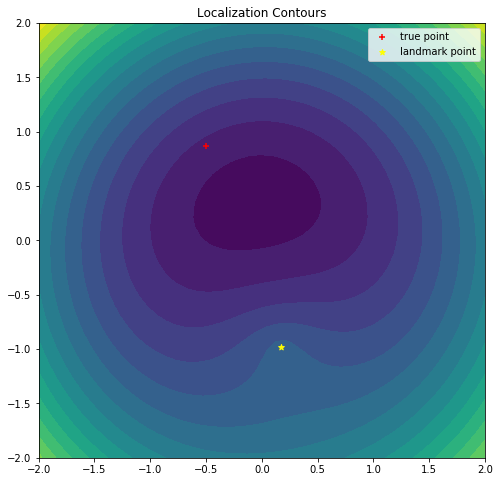

In [72]:
sol2(1)

In [62]:
point = []
distance = []
sigma = [0.3,0.23,0.25]

xx=np.linspace(-2,2,50)
yy=np.linspace(-2,2,50)

radius = 1

angle = np.random.randint(360)
alpha = 2 * (math.pi *1)/3

xVal = math.cos(alpha) * radius
yVal = math.sin(alpha) * radius

distanceList=[]
mapEstimatorList=[]

# For K = 2

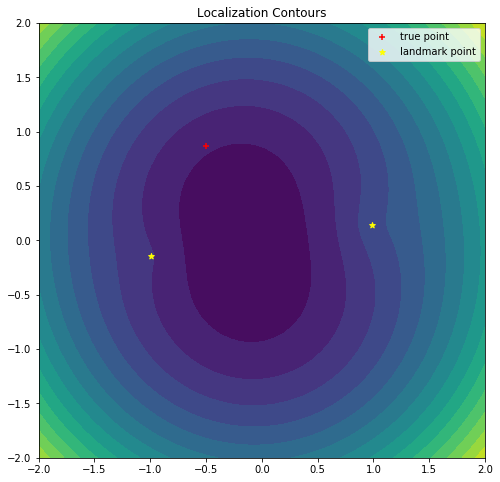

In [63]:
sol2(2)

In [60]:
point = []
distance = []
sigma = [0.3,0.23,0.25]

xx=np.linspace(-2,2,50)
yy=np.linspace(-2,2,50)

radius = 1

angle = np.random.randint(360)
alpha = 2 * (math.pi *1)/3

xVal = math.cos(alpha) * radius
yVal = math.sin(alpha) * radius

distanceList=[]
mapEstimatorList=[]

# For K = 3

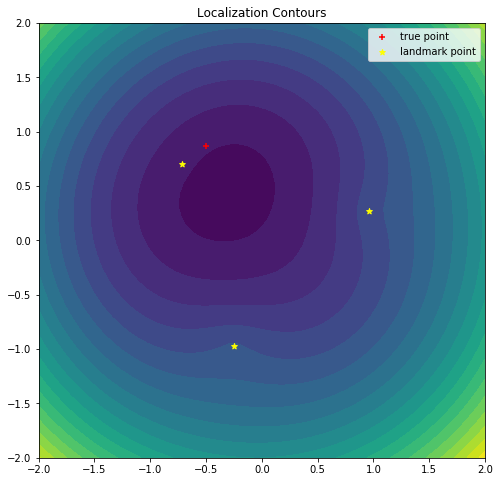

In [61]:
sol2(3)

In [50]:
point = []
distance = []
sigma = [0.3,0.23,0.25]

xx=np.linspace(-2,2,50)
yy=np.linspace(-2,2,50)

radius = 1

angle = np.random.randint(360)
alpha = 2 * (math.pi *1)/3

xVal = math.cos(alpha) * radius
yVal = math.sin(alpha) * radius

distanceList=[]
mapEstimatorList=[]

# For K = 4

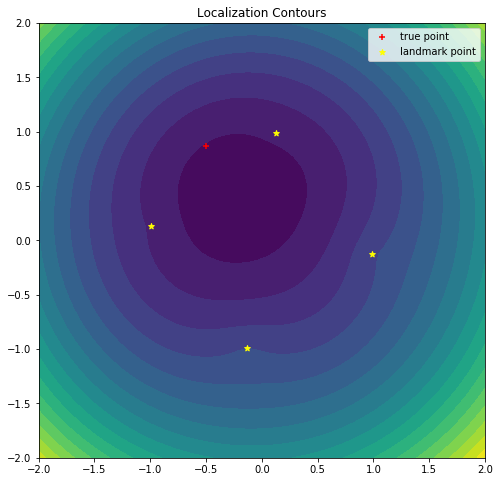

In [51]:
sol2(4)

In [47]:
point = []
distance = []
sigma = [0.3,0.23,0.25]

xx=np.linspace(-2,2,50)
yy=np.linspace(-2,2,50)

radius = 1

angle = np.random.randint(360)
alpha = 2 * (math.pi *1)/3

xVal = math.cos(alpha) * radius
yVal = math.sin(alpha) * radius

distanceList=[]
mapEstimatorList=[]

# For K = 10

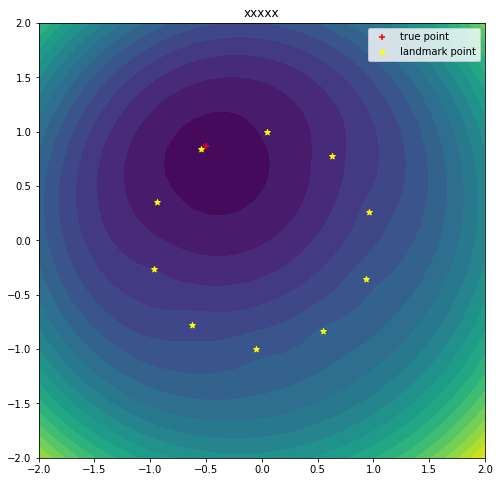

In [32]:
sol2(10)

# So, MAP estimate gets closer to true position as value of K increases. Contour size decreases as the number of landmark points increases. 

# Here, True point is given a fixed point and the landmark points are generated randomly. Sampling is rejected if range is turned out negative.